In [1]:
import numpy as np
import scipy as sc

import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import torch.optim as optim


# add paths to access shared code
import sys
sys.path.append("..")
sys.path.append("../scripts/")

# import library implementing models
import neuroprob as nprb
from neuroprob import utils

# import utility code for model building/training/loading
import lib
import HDC

# get GPU device if available
gpu_dev = 0
dev = utils.pytorch.get_device(gpu=gpu_dev)

# use custom plotting settings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('../report_plots/report.mplstyle')

# useful colormap
white = '#ffffff'
red = '#ff0000'
blue = '#0000ff'
weight_map = utils.plot.make_cmap([blue, white, red], 'weight_map')


import warnings
warnings.simplefilter('ignore')

PyTorch version: 1.13.1+cu117
Using device: cuda:0


# Figure about info measures for presentation

In [2]:

loaded = np.load('../data/fisher_results.npz', allow_pickle=True)
tc_rates, tc_FFs, fishers, poisson_fishers, label_hdc = loaded[loaded.files[0]], loaded[loaded.files[1]], loaded[loaded.files[2]], loaded[loaded.files[3]], loaded[loaded.files[4]]


loaded = np.load('../data/ssi_results.npz', allow_pickle=True)
tc_rates, tc_FFs, SSIs, SSIs_poisson, label_hdc = loaded[loaded.files[0]], loaded[loaded.files[1]], loaded[loaded.files[2]], loaded[loaded.files[3]], loaded[loaded.files[4]]

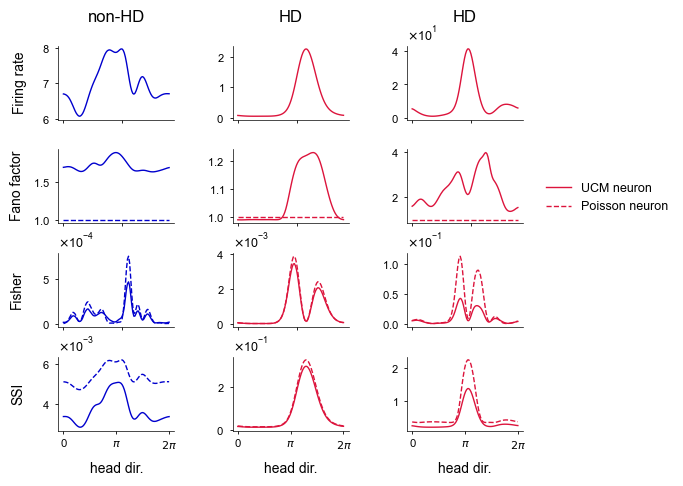

In [12]:
fig = plt.figure(figsize=(6,5))
angles = np.linspace(0, 360, tc_rates.shape[1])

colors = ['mediumblue', 'crimson']


gs1 = gridspec.GridSpec(1, 3, figure=fig, wspace=0.5)

for i, ne in enumerate([6, 64, 65]):
    
    gs = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs1[i], hspace=0.4)

    ax = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2]), fig.add_subplot(gs[3])]

    if i == 0:
        ax[0].set_title('non-HD', pad=17)
    elif i == 1:
        ax[0].set_title('HD', pad=17)
    else:
        ax[0].set_title('HD', pad=17)   

    if i==0:
        c = colors[0]
    else:
        c = colors[1]
    ax[0].plot(angles, tc_rates[ne], c=c)
    ax[1].plot(angles, tc_FFs[ne], c=c, label='UCM neuron')
    ax[1].plot(angles, np.ones_like(angles), '--', c=c, label='Poisson neuron')
    ax[2].plot(angles, fishers[ne], c=c, label='UCM neuron')
    ax[2].plot(angles, poisson_fishers[ne], '--', c=c, label='Poisson neuron')
    ax[3].plot(angles, SSIs[ne], c=c,  label='UCM neuron')
    ax[3].plot(angles, SSIs_poisson[ne], '--', c=c, label='Poisson neuron')

    if i == 0:
        ax[0].set_ylabel('Firing rate', labelpad=11)
        ax[1].set_ylabel('Fano factor', labelpad=6)
        ax[2].set_ylabel('Fisher', labelpad=13)
        ax[3].set_ylabel('SSI', labelpad=12)

    ax[3].set_xlabel('head dir.')
    ax[3].set_xticks([0, 180, 360])
    ax[3].set_xticklabels(['0', '$\pi$', '$2\pi$'], fontsize=8)

    ax[0].set_xticklabels([])
    ax[1].set_xticklabels([])
    ax[2].set_xticklabels([])

    if i==2:
        ax[1].legend(prop={'size': 9}, bbox_to_anchor=(1.1,0.7))
        #ax[2].legend(prop={'size': 9}, bbox_to_anchor=(1.1,0.7))
        #ax[3].legend(prop={'size': 9}, bbox_to_anchor=(1.1,0.7))


    for j in [0,1,2,3]:
        ax[j].yaxis.get_major_formatter().set_scientific('%.1e')
        ax[j].yaxis.get_major_formatter().set_powerlimits((0,0))
        ax[j].yaxis.get_major_formatter().set_useMathText(True)
        ax[j].tick_params(axis='both', which='major', labelsize=8)